In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [5]:
dating = pd.read_csv('./data/datingTestSet.txt',sep='\t', header=None)

In [6]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
0    1000 non-null int64
1    1000 non-null float64
2    1000 non-null float64
3    1000 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 31.3+ KB


In [10]:
train = dating.loc[:,0:2]
target = dating[3]

In [12]:
# 分类问题
target.unique()

array(['largeDoses', 'smallDoses', 'didntLike'], dtype=object)

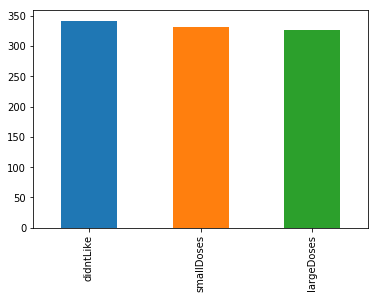

In [15]:
# 先观察样本的分布情况
import matplotlib.pyplot as plt
%matplotlib inline

target.value_counts().plot(kind='bar')

In [16]:
# 因为数据都是数学类型，不需要再进行映射处理或者哑编码操作
train.dtypes

0      int64
1    float64
2    float64
dtype: object

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
0    1000 non-null int64
1    1000 non-null float64
2    1000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 23.5 KB


In [ ]:
# 所有的样本集都需要做无量纲处理
# 区间缩放  (x-x.mean)/x.std   压缩到0-1区间
# 归一化  行方向处理 
# 标准化 列方向处理

In [18]:
train

,0,1,2
0,40920,8.326976,0.953952
1,14488,7.153469,1.673904
2,26052,1.441871,0.805124
3,75136,13.147394,0.428964
4,38344,1.669788,0.134296
5,72993,10.141740,1.032955
6,35948,6.830792,1.213192
7,42666,13.276369,0.543880
8,67497,8.631577,0.749278
9,35483,12.273169,1.508053


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=2)

In [28]:
knnclf = KNeighborsClassifier(n_neighbors=9)
knnclf.fit(X_train, y_train)

s1 = knnclf.score(X_train, y_train)
s2 = knnclf.score(X_test, y_test)
print("训练集评分{}, 测试集评分{}".format(s1, s2))

训练集评分0.83875, 测试集评分0.765


In [31]:
k_list = np.arange(5,90,step=2)

scores1 = []
scores2 = []

for k in k_list:
    knnclf = KNeighborsClassifier(n_neighbors=k)
    knnclf.fit(X_train, y_train)

    s1 = knnclf.score(X_train, y_train)
    s2 = knnclf.score(X_test, y_test)
    scores1.append(s1)
    scores2.append(s2)
    print("训练集评分{}, 测试集评分{}".format(s1, s2))

训练集评分0.8625, 测试集评分0.77
训练集评分0.84375, 测试集评分0.78
训练集评分0.83875, 测试集评分0.765
训练集评分0.8375, 测试集评分0.78
训练集评分0.835, 测试集评分0.775
训练集评分0.835, 测试集评分0.785
训练集评分0.83125, 测试集评分0.77
训练集评分0.8325, 测试集评分0.785
训练集评分0.82875, 测试集评分0.78
训练集评分0.825, 测试集评分0.795
训练集评分0.82625, 测试集评分0.8
训练集评分0.8275, 测试集评分0.8
训练集评分0.8225, 测试集评分0.795
训练集评分0.82625, 测试集评分0.795
训练集评分0.825, 测试集评分0.8
训练集评分0.82, 测试集评分0.805
训练集评分0.82125, 测试集评分0.795
训练集评分0.82, 测试集评分0.805
训练集评分0.82125, 测试集评分0.8
训练集评分0.82, 测试集评分0.805
训练集评分0.82, 测试集评分0.805
训练集评分0.82, 测试集评分0.805
训练集评分0.82, 测试集评分0.805
训练集评分0.82125, 测试集评分0.81
训练集评分0.82125, 测试集评分0.81
训练集评分0.82375, 测试集评分0.81
训练集评分0.82375, 测试集评分0.81
训练集评分0.82375, 测试集评分0.81
训练集评分0.82375, 测试集评分0.81
训练集评分0.825, 测试集评分0.81
训练集评分0.8225, 测试集评分0.81
训练集评分0.825, 测试集评分0.81
训练集评分0.825, 测试集评分0.81
训练集评分0.825, 测试集评分0.81
训练集评分0.825, 测试集评分0.81
训练集评分0.825, 测试集评分0.81
训练集评分0.82375, 测试集评分0.81
训练集评分0.8225, 测试集评分0.81
训练集评分0.8225, 测试集评分0.81
训练集评分0.82375, 测试集评分0.81
训练集评分0.8225, 测试集评分0.81
训练集评分0.8225, 测试集评分0.81
训练集评分0.82375, 测试集评分0.81


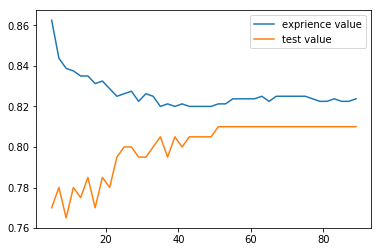

In [32]:
plt.plot(k_list, scores1, label="exprience value")
plt.plot(k_list, scores2, label="test value")
plt.legend()

# 观察结果，发现k值在49时比较合适

In [33]:
knnclf = KNeighborsClassifier(n_neighbors=49)

In [36]:
knnclf.fit(X_train, y_train)

knnclf.score(X_test, y_test)

0.805

In [39]:
X_train1 = X_train.loc[:,0]
X_test1 = X_test.loc[:,0]

In [43]:
# 观察发现，我们只获取样本集的第一列数据，重新训练模型，得到评分和完整模型的评分几乎一致，说明算法的预测结果主要取决于第一列特征
# 产生此问题的原因在于样本集没有做量纲话处理
knnclf.fit(X_train1.reshape(-1,1), y_train)

knnclf.score(X_test1.reshape(-1,1), y_test)

C:\Users\ALIENWARE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\ALIENWARE\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


0.805

In [44]:
# 对数据做无量纲话处理， 使用区间缩放法
from sklearn.preprocessing import MinMaxScaler
train_good = MinMaxScaler().fit_transform(train)

In [45]:
train_good

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(train_good, target, test_size=0.2, random_state=2)

In [47]:
knnclf = KNeighborsClassifier(n_neighbors=5)

knnclf.fit(X_train, y_train)

knnclf.score(X_train, y_train)

0.965

In [48]:
knnclf.score(X_test, y_test)

0.955

In [49]:
# 获取最优参数
k_list = np.arange(5,90,step=2)

scores1 = []
scores2 = []

for k in k_list:
    knnclf = KNeighborsClassifier(n_neighbors=k)
    knnclf.fit(X_train, y_train)

    s1 = knnclf.score(X_train, y_train)
    s2 = knnclf.score(X_test, y_test)
    scores1.append(s1)
    scores2.append(s2)
    print("训练集评分{}, 测试集评分{}".format(s1, s2))

训练集评分0.965, 测试集评分0.955
训练集评分0.96625, 测试集评分0.945
训练集评分0.95875, 测试集评分0.945
训练集评分0.95625, 测试集评分0.945
训练集评分0.9575, 测试集评分0.94
训练集评分0.95875, 测试集评分0.945
训练集评分0.96, 测试集评分0.945
训练集评分0.95875, 测试集评分0.945
训练集评分0.955, 测试集评分0.945
训练集评分0.955, 测试集评分0.945
训练集评分0.95625, 测试集评分0.945
训练集评分0.9575, 测试集评分0.945
训练集评分0.955, 测试集评分0.94
训练集评分0.955, 测试集评分0.94
训练集评分0.95125, 测试集评分0.94
训练集评分0.955, 测试集评分0.94
训练集评分0.9525, 测试集评分0.94
训练集评分0.95375, 测试集评分0.94
训练集评分0.95125, 测试集评分0.945
训练集评分0.94875, 测试集评分0.945
训练集评分0.9475, 测试集评分0.945
训练集评分0.945, 测试集评分0.945
训练集评分0.94875, 测试集评分0.945
训练集评分0.95, 测试集评分0.945
训练集评分0.94625, 测试集评分0.95
训练集评分0.94375, 测试集评分0.95
训练集评分0.94375, 测试集评分0.945
训练集评分0.9425, 测试集评分0.95
训练集评分0.945, 测试集评分0.95
训练集评分0.94375, 测试集评分0.945
训练集评分0.94, 测试集评分0.94
训练集评分0.94, 测试集评分0.94
训练集评分0.94125, 测试集评分0.945
训练集评分0.945, 测试集评分0.945
训练集评分0.94375, 测试集评分0.945
训练集评分0.945, 测试集评分0.945
训练集评分0.94375, 测试集评分0.945
训练集评分0.94125, 测试集评分0.94
训练集评分0.9425, 测试集评分0.94
训练集评分0.94125, 测试集评分0.94
训练集评分0.93625, 测试集评分0.93
训练集评分0.93625, 测试集评分0.93
训练集评分0

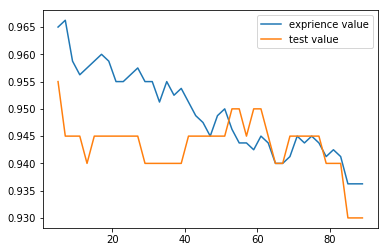

In [51]:
plt.plot(k_list, scores1, label="exprience value")
plt.plot(k_list, scores2, label="test value")
plt.legend()

In [52]:
knnclf = KNeighborsClassifier(n_neighbors=49)
knnclf.fit(X_train, y_train)
knnclf.score(X_train, y_train)

0.94875

In [53]:
knnclf.score(X_test, y_test)

0.945

In [ ]:
svm 处理小样本集，泛化能力强

In [70]:
from sklearn.svm import SVC

svc = SVC(kernel="linear", C=2)

In [71]:
svc.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [72]:
svc.score(X_train, y_train)

0.9275

In [73]:
svc.score(X_test, y_test)

0.93

In [ ]:
# kernel
# C 
# 

In [74]:
from sklearn.model_selection import GridSearchCV

In [87]:
svc = SVC()
params = {
    "kernel":["linear","poly","rbf"],
    "C":[15,20,25,30,35,40,45,50]
}
gscv = GridSearchCV(estimator=svc, param_grid=params)

In [92]:
# 网格搜索对象必须训练数据，才能找到最优解
gscv.fit(X_train, y_train)

C:\Users\ALIENWARE\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ALIENWARE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ALIENWARE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ALIENWARE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will ch

C:\Users\ALIENWARE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ALIENWARE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ALIENWARE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ALIENWARE\Anaconda3\lib\site-packages\sklearn\svm\base.py:

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [15, 20, 25, 30, 35, 40, 45, 50],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [89]:
# 获取最优解
gscv.best_params_

{'C': 15, 'kernel': 'rbf'}

In [93]:
# 可以直接使用网格搜索对象进行预测
gscv.score(X_test,y_test)

0.945

In [94]:
gscv.score(X_train, y_train)

0.9575

In [95]:
# 获取最优模型
gscv.best_estimator_

SVC(C=15, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [98]:
# 特征有没有选择的必要
DataFrame(train_good).describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,0.368514,0.313583,0.490401
std,0.240564,0.202856,0.293467
min,0.000000,0.000000,0.000000
25%,0.151151,0.140251,0.240703
50%,0.346970,0.315268,0.477032
75%,0.522786,0.480727,0.750543
max,1.000000,1.000000,1.000000


In [ ]:
# KNN  拟合度好 最优解在96    n_neighbors = 49
# SVC                   95    C=15， kernel='rbf'

In [ ]:
# 算法的运行时间

In [102]:
%%timeit
knnclf.fit(X_train, y_train)

1.17 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [100]:
%%timeit 
knnclf.predict(X_train)

13.2 ms ± 2.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [101]:
%%timeit
knnclf.predict(X_test)

3.51 ms ± 482 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [104]:
svc = SVC(kernel="rbf", C=15, gamma="auto")

In [105]:
%%timeit
svc.fit(X_train, y_train)

5.57 ms ± 751 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [107]:
%%timeit
svc.predict(X_train)

4.32 ms ± 767 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [108]:
%%timeit
svc.predict(X_test)

895 µs ± 62.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# 算法的稳定性
# 多次训练，多次预测，看评分的方差， 平均评分

In [109]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_good, target, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_good, target, test_size=0.2)

In [110]:
knnclf1 = KNeighborsClassifier(n_neighbors=49)
knnclf2 = KNeighborsClassifier(n_neighbors=49)

In [113]:
knnclf1.fit(X_train1, y_train1)
knnclf2.fit(X_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [114]:
knnclf1.score(X_train1, y_train1)

0.94875

In [115]:
knnclf2.score(X_train2, y_train2)

0.94375

In [120]:
knnclf = KNeighborsClassifier(n_neighbors=49)
scores1 = []
scores2 = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(train_good, target, test_size=0.2)
    knnclf.fit(X_train, y_train)
    scores1.append(knnclf.score(X_train, y_train))
    scores2.append(knnclf.score(X_test, y_test))
    
scores1 = np.array(scores1)
scores2 = np.array(scores2)
print("训练集评分最大值{}， 最小值{}， 标准差{} 平均分{}".format(scores1.max(), scores1.min(), scores1.std(), scores1.mean()))
print("测试集评分最大值{}， 最小值{}， 标准差{} 平均分{}".format(scores2.max(), scores2.min(), scores2.std(), scores2.mean()))

训练集评分最大值0.96125， 最小值0.9375， 标准差0.003958278508392259 平均分0.9485625
测试集评分最大值0.985， 最小值0.91， 标准差0.014448096760473305 平均分0.9475500000000001


In [122]:
knnclf = SVC(kernel="rbf", C=15, gamma="auto")
scores1 = []
scores2 = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(train_good, target, test_size=0.2)
    knnclf.fit(X_train, y_train)
    scores1.append(knnclf.score(X_train, y_train))
    scores2.append(knnclf.score(X_test, y_test))
    
scores1 = np.array(scores1)
scores2 = np.array(scores2)
print("训练集评分最大值{}， 最小值{}， 标准差{} 平均分{}".format(scores1.max(), scores1.min(), scores1.std(), scores1.mean()))
print("测试集评分最大值{}， 最小值{}， 标准差{} 平均分{}".format(scores2.max(), scores2.min(), scores2.std(), scores2.mean()))

训练集评分最大值0.96375， 最小值0.94625， 标准差0.0038075582726991857 平均分0.9538
测试集评分最大值0.975， 最小值0.915， 标准差0.013639189858638946 平均分0.9483499999999999
